In [4]:
DIR='/Users/ravali/Desktop/DataScience-Clustering/Data'
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
ratings = pd.read_csv(DIR+'/ratings.csv', delimiter=',')
links = pd.read_csv(DIR+'/links.csv', delimiter=',')
tags = pd.read_csv(DIR+'/tags.csv', delimiter=',')
movies = pd.read_csv(DIR+'/movies.csv', delimiter=',')
#display(ratings.head())
#display(links.head())
#display(tags.head())
#display(movies.head())
df_merged121=pd.merge(ratings, tags, on=['userId','movieId'], how='inner')
#display(df_merged121)
df_dropped=df_merged121.drop(['timestamp_x', 'timestamp_y'], axis=1)
#display(df_dropped)
df_merged3=pd.merge(df_dropped,movies, on=['movieId'], how='inner')
#display(df_merged3)
df_mergedfinal=pd.merge(df_merged3,links, on=['movieId'], how='inner')
#display(df_mergedfinal)
df_final=df_mergedfinal.drop(['imdbId','tmdbId'],axis=1)
#display(df_final)
print(df_final.dtypes)
obj_df = df_final.select_dtypes(include=['object']).copy()
obj_df.head()
obj_df["tag"] = obj_df["tag"].astype('category')
obj_df["tag"] = obj_df["tag"].cat.codes
obj_df["title"] = obj_df["title"].astype('category')
obj_df["title"] = obj_df["title"].cat.codes
obj_df["genres"] = obj_df["genres"].astype('category')
obj_df["genres"] = obj_df["genres"].cat.codes
#display(obj_df)
#display(df_final)
df_final = pd.concat([df_final, obj_df], axis=1)
#display(df_final)




userId       int64
movieId      int64
rating     float64
tag         object
title       object
genres      object
dtype: object


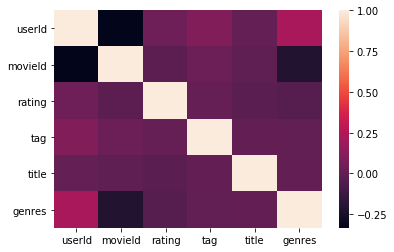

In [5]:
import seaborn as sns
corr = df_final.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values)

In [6]:
corr.style.background_gradient()

,userId,movieId,rating,tag,title,genres
userId,1,-0.333151,0.0430017,0.102346,0.0141757,0.221959
movieId,-0.333151,1,-0.0118013,0.0320036,-0.000197065,-0.213147
rating,0.0430017,-0.0118013,1,0.0203991,-0.0184046,-0.0362946
tag,0.102346,0.0320036,0.0203991,1,0.00694488,0.000620484
title,0.0141757,-0.000197065,-0.0184046,0.00694488,1,0.00641851
genres,0.221959,-0.213147,-0.0362946,0.000620484,0.00641851,1


/Users/ravali/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


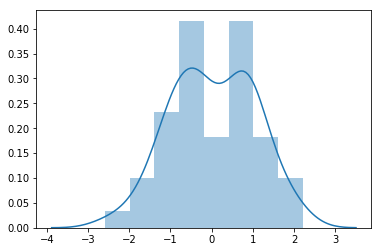

In [7]:
df_final= np.random.normal(size=100)
sns.distplot(df_final);


/Users/ravali/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


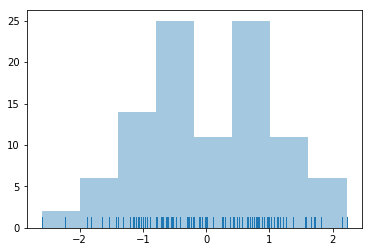

In [8]:
sns.distplot(df_final, kde=False, rug=True);

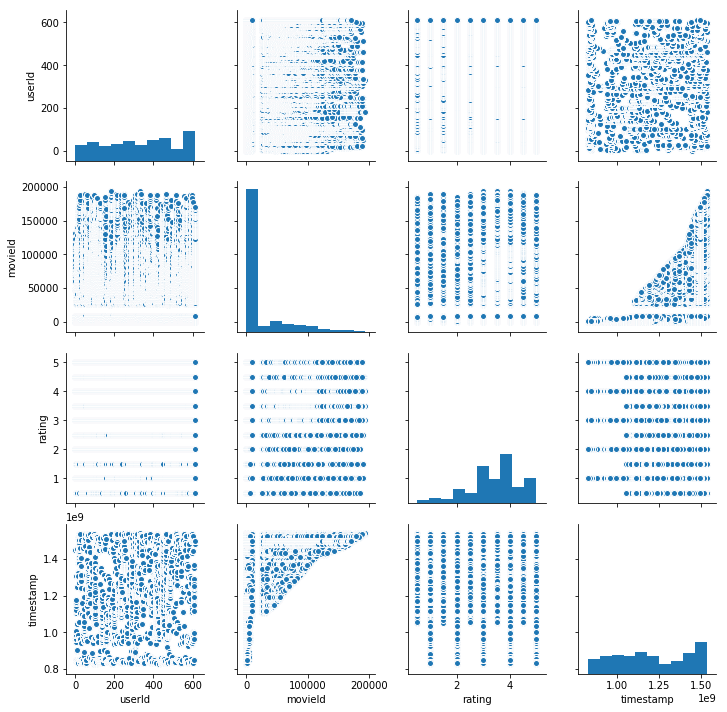

In [9]:

sns.pairplot(ratings);